STUDENT NAME: ANN MARIYA VAZHAPPILLY NICLAVOS
STUDENT ID: VAZ22608613

Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.sparse  # Import the scipy.sparse module
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

Loading and Combining Datasets

In [2]:
# Load datasets
df1 = pd.read_csv('/content/drive/MyDrive/Msc Project/diabetic_data_subset_500.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Msc Project/diabetic_data_new_subset_500.csv')

# Combine datasets if needed
df = pd.concat([df1, df2], ignore_index=True).drop_duplicates()

# Save the combined datasets to a CSV file
combined_dataset_path = 'combined_diabetic_data.csv'
df.to_csv(combined_dataset_path, index=False)
print(f"Combined dataset saved to {combined_dataset_path}")

Combined dataset saved to combined_diabetic_data.csv


Data Cleaning

In [3]:
# Drop rows with missing target
df_cleaned = df.dropna(subset=['time_in_hospital'])

# Inspect the data
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 0 to 1999
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              1999 non-null   int64 
 1   patient_nbr               1999 non-null   int64 
 2   race                      1999 non-null   object
 3   gender                    1999 non-null   object
 4   age                       1999 non-null   object
 5   weight                    1999 non-null   object
 6   admission_type_id         1999 non-null   int64 
 7   discharge_disposition_id  1999 non-null   int64 
 8   admission_source_id       1999 non-null   int64 
 9   time_in_hospital          1999 non-null   int64 
 10  payer_code                1999 non-null   object
 11  medical_specialty         1999 non-null   object
 12  num_lab_procedures        1999 non-null   int64 
 13  num_procedures            1999 non-null   int64 
 14  num_medications           199

Feature Selection and Data Splitting

In [4]:
# Select relevant features and target variable
features = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'num_lab_procedures', 'num_medications', 'number_diagnoses',
    'race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3'
]
target = 'time_in_hospital'

# Split data into features and target
X = df_cleaned[features]
y = df_cleaned[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data Preprocessing

In [5]:
# Preprocessing pipelines for numeric and categorical data
numeric_features = ['num_lab_procedures', 'num_medications', 'number_diagnoses']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3'
]
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

Data Visualization

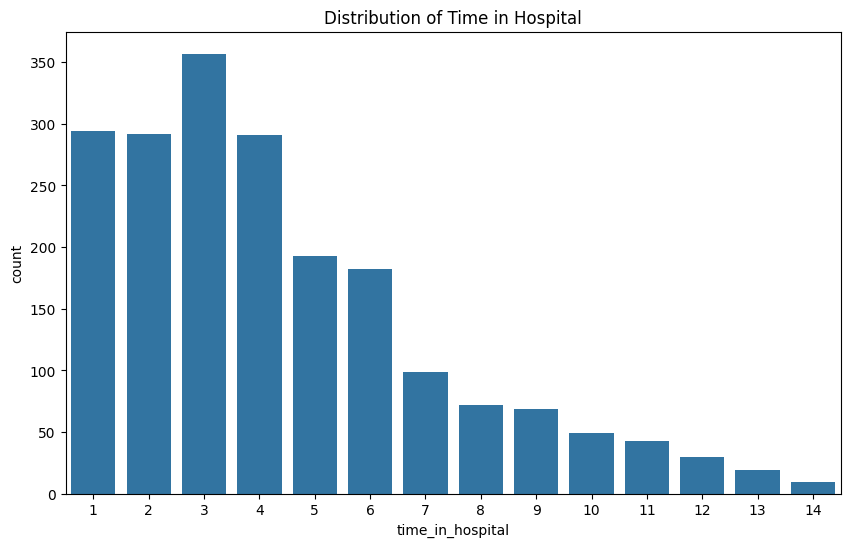

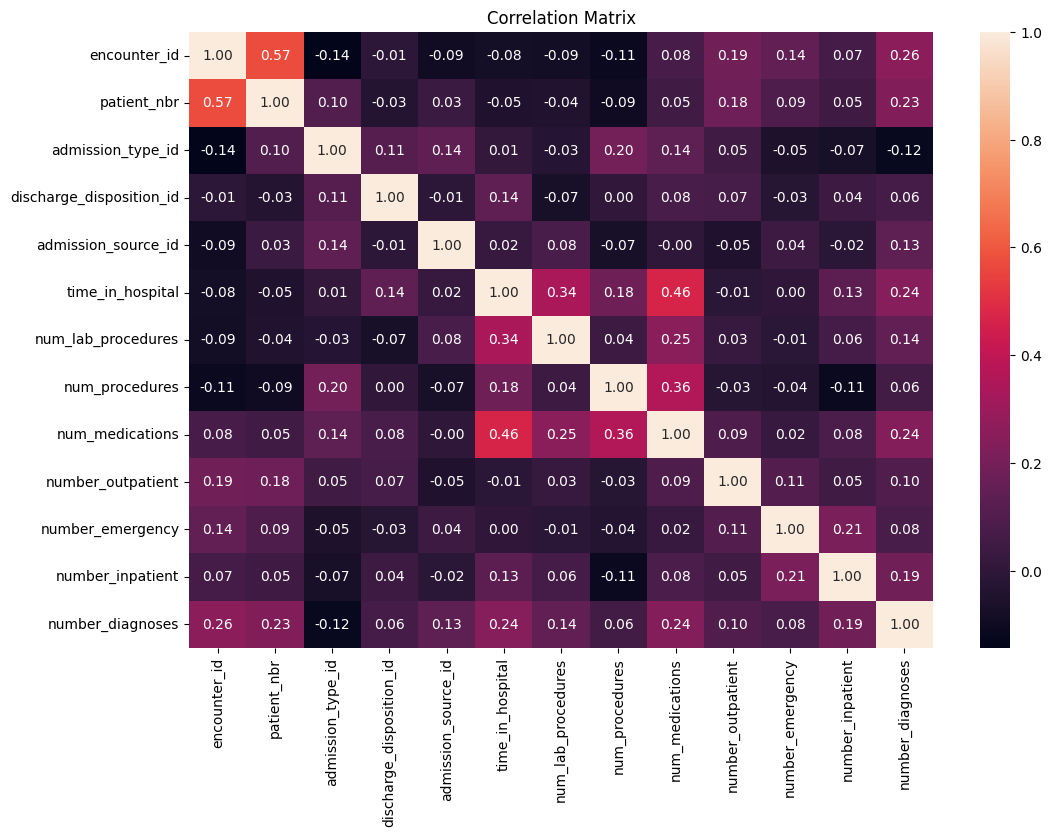

In [6]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='time_in_hospital', data=df_cleaned)
plt.title('Distribution of Time in Hospital')
plt.show()

# Correlation heatmap to see relationships between numerical features
plt.figure(figsize=(12, 8))
numerical_df = df_cleaned.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Adding the Models for Benchmarking

In [7]:
# 1. Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression RMSE: {rmse_lr}")

# 2. Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', DecisionTreeRegressor(random_state=42))])
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f"Decision Tree RMSE: {rmse_dt}")

# 3. K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
knn_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', KNeighborsRegressor())])
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f"K-Nearest Neighbors RMSE: {rmse_knn}")

# 4. Support Vector Regressor
from sklearn.svm import SVR
svr_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', SVR())])
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print(f"Support Vector Regressor RMSE: {rmse_svr}")

# 5. Ridge Regression
from sklearn.linear_model import Ridge
ridge_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', Ridge())])
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"Ridge Regression RMSE: {rmse_ridge}")

# 6. Lasso Regression
from sklearn.linear_model import Lasso
lasso_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', Lasso())])
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"Lasso Regression RMSE: {rmse_lasso}")

 # 7. Random Forest

rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")

Linear Regression RMSE: 1.9956609485635255
Decision Tree RMSE: 1.4448183276799889
K-Nearest Neighbors RMSE: 2.1323226772700234
Support Vector Regressor RMSE: 2.014522712670493
Ridge Regression RMSE: 1.8014143904897715
Lasso Regression RMSE: 2.6673333734783453
Random Forest RMSE: 1.3946354362341435


Random Forest Modeling

In [8]:
# Define a Random Forest model pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict and evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")

Random Forest RMSE: 1.3946354362341435


Neural Network Modeling

X_train_nn type: <class 'numpy.ndarray'>, is sparse: False
X_test_nn type: <class 'numpy.ndarray'>, is sparse: False
X_train_nn type after conversion: <class 'numpy.ndarray'>, shape: (1599, 615)
X_test_nn type after conversion: <class 'numpy.ndarray'>, shape: (400, 615)
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 23.6347 - val_loss: 7.3045 - learning_rate: 0.0010
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.6905 - val_loss: 5.6472 - learning_rate: 0.0010
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7074 - val_loss: 5.1775 - learning_rate: 0.0010
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3726 - val_loss: 4.8688 - learning_rate: 0.0010
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8844 - val_loss: 4.6393 - learning_rate: 0.0010
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7651 - val_loss: 4.6429 - learning_rate: 0.0010
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4982 - val_l

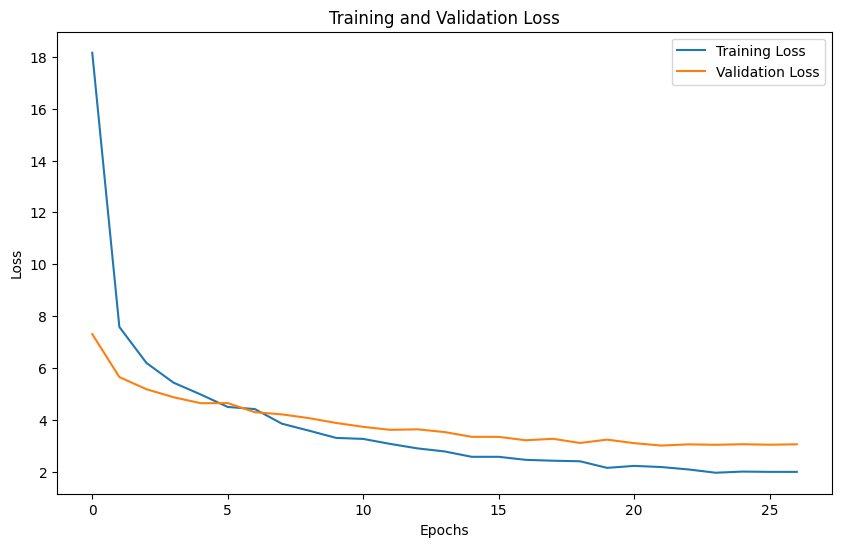

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Final Neural Network RMSE: 1.4683802529056165


In [9]:
# Modify the OneHotEncoder to produce dense output
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Ensure dense output
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define a Neural Network model with improvements
def build_nn_model(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(64, activation='relu', kernel_regularizer='l2'))  # Added L2 regularization
    model.add(Dropout(0.4))  # Increased dropout rate to 0.4
    model.add(Dense(32, activation='relu', kernel_regularizer='l2'))  # Added L2 regularization
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse')
    return model

X_train_nn = preprocessor.fit_transform(X_train)
X_test_nn = preprocessor.transform(X_test)

# Check if the output is sparse
print(f"X_train_nn type: {type(X_train_nn)}, is sparse: {scipy.sparse.issparse(X_train_nn)}")
print(f"X_test_nn type: {type(X_test_nn)}, is sparse: {scipy.sparse.issparse(X_test_nn)}")

# If it's sparse, convert it to dense format
if scipy.sparse.issparse(X_train_nn):
    X_train_nn = X_train_nn.toarray()
if scipy.sparse.issparse(X_test_nn):
    X_test_nn = X_test_nn.toarray()

# Now, check again to confirm
print(f"X_train_nn type after conversion: {type(X_train_nn)}, shape: {X_train_nn.shape}")
print(f"X_test_nn type after conversion: {type(X_test_nn)}, shape: {X_test_nn.shape}")

# Build and train the neural network
nn_model = build_nn_model(X_train_nn.shape[1])

# Define callbacks: EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Re-train the model with the correct data format
history = nn_model.fit(X_train_nn, y_train, validation_data=(X_test_nn, y_test),
                       epochs=100, batch_size=32,
                       callbacks=[early_stopping, lr_scheduler])

# Visualize training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the final model on the test set
y_pred_nn = nn_model.predict(X_test_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
print(f"Final Neural Network RMSE: {rmse_nn}")

Hyperparameter Tuning with GridSearchCV

In [10]:
# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model performance
print(f"Best parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
print(f"Tuned Random Forest RMSE: {rmse_best_rf}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters: {'regressor__max_depth': None, 'regressor__n_estimators': 100}
Tuned Random Forest RMSE: 1.3946354362341435


Hyperparameter Tuning with RandomizedSearchCV

In [11]:
# Corrected parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2', None]
}

# Running RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_grid, cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1, n_iter=50, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and model performance
print(f"Best parameters: {random_search.best_params_}")
best_rf_model = random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
print(f"Tuned Random Forest RMSE: {rmse_best_rf}")

Best parameters: {'regressor__n_estimators': 300, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': None}
Tuned Random Forest RMSE: 1.367074136411206


Saving and Loading Models

In [12]:
# Save the trained neural network model using the recommended format
nn_model.save('nn_model.keras')

# Save the Random Forest model using joblib
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Load the saved models
loaded_rf_model = joblib.load('best_rf_model.pkl')
loaded_nn_model = load_model('nn_model.keras')
loaded_nn_model.compile(optimizer='adam', loss='mse')

Making Predictions with Loaded Models

In [13]:
# Predict on new data
new_data = X_test.iloc[:5]  # Example new data
new_data_preprocessed = preprocessor.transform(new_data)
rf_predictions = loaded_rf_model.predict(new_data)
nn_predictions = loaded_nn_model.predict(new_data_preprocessed)

print("Random Forest Predictions:", rf_predictions)
print("Neural Network Predictions:", nn_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Random Forest Predictions: [8.34333333 3.82666667 9.19666667 2.34666667 3.9       ]
Neural Network Predictions: [[7.7602262]
 [2.84537  ]
 [9.777432 ]
 [2.0166707]
 [3.337321 ]]


Final Model Pipeline and Prediction

In [14]:
# Define the Random Forest model within a pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning with RandomizedSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(rf_pipeline, param_grid, cv=5,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1, n_iter=50, random_state=42)
random_search.fit(X_train, y_train)

# Save the best model pipeline
best_rf_pipeline = random_search.best_estimator_
joblib.dump(best_rf_pipeline, 'best_rf_pipeline.pkl')

['best_rf_pipeline.pkl']

Predicting on Raw New Data

In [15]:
# Load the saved pipeline
loaded_rf_pipeline = joblib.load('best_rf_pipeline.pkl')
loaded_nn_model = load_model('nn_model.keras')
loaded_nn_model.compile(optimizer='adam', loss='mse')  # Ensure the model is compiled

# Example new data (raw form, similar to the structure of the original dataset)
raw_new_data = pd.DataFrame({
    'admission_type_id': [1, 2, 3, 4, 5],
    'discharge_disposition_id': [1, 1, 6, 1, 3],
    'admission_source_id': [7, 7, 2, 4, 6],
    'num_lab_procedures': [41, 60, 49, 74, 40],
    'num_medications': [13, 16, 8, 9, 20],
    'number_diagnoses': [8, 9, 7, 5, 8],
    'race': ['Caucasian', 'AfricanAmerican', 'Asian', 'Hispanic', 'Other'],
    'gender': ['Female', 'Male', 'Female', 'Male', 'Female'],
    'age': ['[70-80)', '[50-60)', '[30-40)', '[60-70)', '[40-50)'],
    'diag_1': ['428', '250', '401', '414', '427'],
    'diag_2': ['250', '428', '250', '401', '414'],
    'diag_3': ['401', '414', '427', '428', '250']
})

# Predict using the loaded pipeline (preprocessing is handled within the pipeline)
rf_predictions = loaded_rf_pipeline.predict(raw_new_data)

# Round the predictions to the nearest whole number
rf_predictions_rounded = np.round(rf_predictions)

# Display the rounded predictions
print("Rounded Random Forest Predictions (Days in Hospital):", rf_predictions_rounded)

# Preprocess the data for the Neural Network model
new_data_preprocessed = loaded_rf_pipeline.named_steps['preprocessor'].transform(raw_new_data)

# Convert to dense format if necessary (since neural networks usually expect dense input)
if isinstance(new_data_preprocessed, np.ndarray) is False:
    new_data_preprocessed = new_data_preprocessed.toarray()

# Predict using the loaded Neural Network model
nn_predictions = loaded_nn_model.predict(new_data_preprocessed)

# Round the Neural Network predictions to the nearest whole number
nn_predictions_rounded = np.round(nn_predictions)
print("Rounded Neural Network Predictions (Days in Hospital):", nn_predictions_rounded)

combined_prediction = np.round((rf_predictions_rounded + nn_predictions_rounded) / 2)
print("Combined Prediction (Days in Hospital):", combined_prediction)

Rounded Random Forest Predictions (Days in Hospital): [3. 5. 4. 4. 4.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Rounded Neural Network Predictions (Days in Hospital): [[3.]
 [6.]
 [3.]
 [2.]
 [4.]]
Combined Prediction (Days in Hospital): [[3. 4. 4. 4. 4.]
 [4. 6. 5. 5. 5.]
 [3. 4. 4. 4. 4.]
 [2. 4. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]


Predicting on Single New Data Instance

In [16]:
# Load the saved Random Forest pipeline and Neural Network model
loaded_rf_pipeline = joblib.load('best_rf_pipeline.pkl')
loaded_nn_model = load_model('nn_model.keras')
loaded_nn_model.compile(optimizer='adam', loss='mse')  # Ensure the model is compiled

# Example new data (raw form, similar to the structure of the original dataset)
raw_new_data = pd.DataFrame({
    'admission_type_id': [1],
    'discharge_disposition_id': [1],
    'admission_source_id': [6],
    'num_lab_procedures': [68],
    'num_medications': [20],
    'number_diagnoses': [5],
    'race': ['Caucasian'],
    'gender': ['Female'],
    'age': ['[70-80)'],
    'diag_1': ['250.8'],
    'diag_2': ['599'],
    'diag_3': ['263']
})

# Predict using the loaded Random Forest pipeline (preprocessing is handled within the pipeline)
rf_predictions = loaded_rf_pipeline.predict(raw_new_data)

# Round the Random Forest predictions to the nearest whole number
rf_predictions_rounded = np.round(rf_predictions)
print("Rounded Random Forest Predictions (Days in Hospital):", rf_predictions_rounded)

# Preprocess the data for the Neural Network model
new_data_preprocessed = loaded_rf_pipeline.named_steps['preprocessor'].transform(raw_new_data)

# Convert to dense format if necessary (since neural networks usually expect dense input)
if isinstance(new_data_preprocessed, np.ndarray) is False:
    new_data_preprocessed = new_data_preprocessed.toarray()

# Predict using the loaded Neural Network model
nn_predictions = loaded_nn_model.predict(new_data_preprocessed)

# Round the Neural Network predictions to the nearest whole number
nn_predictions_rounded = np.round(nn_predictions)
print("Rounded Neural Network Predictions (Days in Hospital):", nn_predictions_rounded)

combined_prediction = np.round((rf_predictions_rounded + nn_predictions_rounded) / 2)
print("Combined Prediction (Days in Hospital):", combined_prediction)

Rounded Random Forest Predictions (Days in Hospital): [11.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Rounded Neural Network Predictions (Days in Hospital): [[10.]]
Combined Prediction (Days in Hospital): [[10.]]


Model Interpretation and Feature Importance

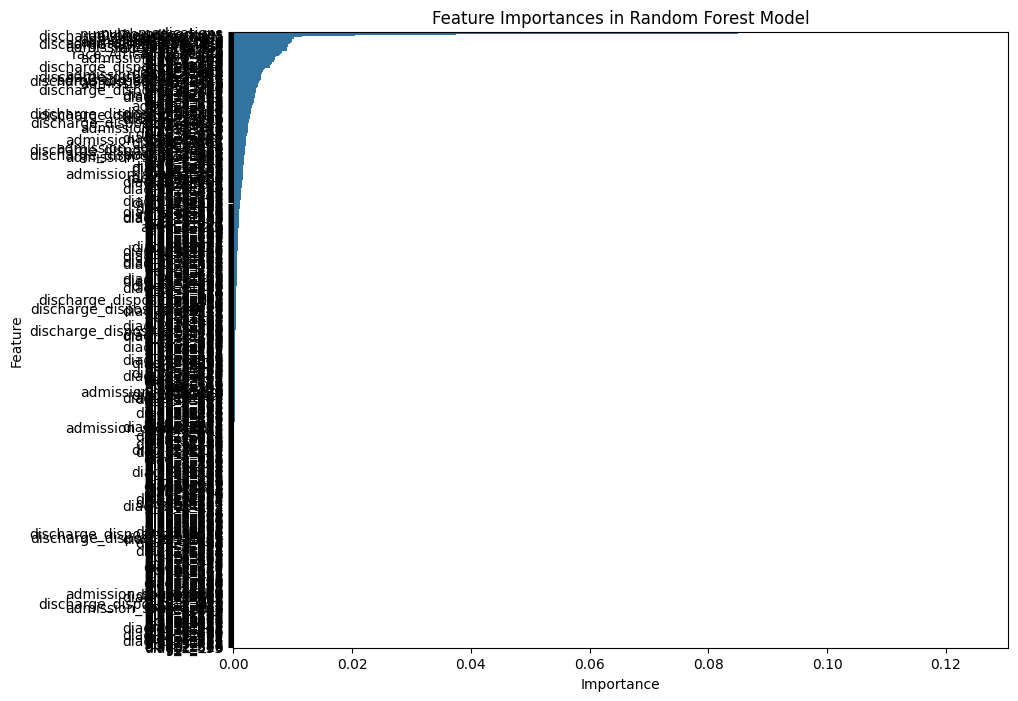

In [17]:
# Extract feature importances from the Random Forest model
importances = best_rf_pipeline.named_steps['regressor'].feature_importances_

# Map feature importances to feature names (after preprocessing)
# Note: OneHotEncoder creates new features for each category, so you need to track those changes
encoder = best_rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
encoded_categories = encoder.get_feature_names_out(categorical_features)

# Combine the feature names from numerical and encoded categorical features
all_features = np.concatenate([numeric_features, encoded_categories])

# Create a DataFrame to visualize feature importances
feature_importances = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances in Random Forest Model')
plt.show()

Cross-Validation for Model Stability

In [18]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with the best Random Forest pipeline
cv_scores = cross_val_score(best_rf_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to RMSE
cv_rmse_scores = np.sqrt(-cv_scores)

# Print cross-validation results
print(f"Cross-Validation RMSE scores: {cv_rmse_scores}")
print(f"Mean CV RMSE: {cv_rmse_scores.mean()}")
print(f"Standard Deviation of CV RMSE: {cv_rmse_scores.std()}")

Cross-Validation RMSE scores: [2.29720207 2.45995085 2.20212265 2.56198645 2.5831157 ]
Mean CV RMSE: 2.4208755453266093
Standard Deviation of CV RMSE: 0.1489355515752453
